# SYDE 522 Project Code
Chang Li, Maathusan Rajendram, Anastasia Santasheva, Evan Yeung

## Import and Load  Dataset
* Select data set (Portugese course or Math course)

In [156]:
# standard useful packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# validation & normalization methods
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut

# accuracy, error, log loss methods
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

# dim reduction & classification methods 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

# make matplotlib to show plots inline
%matplotlib inline


# import data from csv
dataframe = pd.read_csv('student-por.csv', usecols = range(0,33)) # select Portugese course dataset
# dataframe = pd.read_csv('student-mat.csv', usecols = range(0,33)) # select Math course dataset

dataset = dataframe.values
dataset.shape


(649, 33)

## Preprocessing

* Convert nominal attributes with Integer + One-Hot Encoding
* Convert G3 for difference supervised approaches
* NOTE: if we want we can also split further into A,B,C (A= all cols, B=same as A without G2, C=same as B without G1)
    * But leaving this out for now since we know A gives best accuracy

In [116]:
# helper functions for preprocessing
def convertToBinary(df, num_cols):
    df.loc[(df.G3 < 10), 'G3'] = 0
    df.loc[(df.G3 >= 10), 'G3'] = 1
    
    G3 = df.values[:,num_cols-1]
    return G3

def convertToFiveLevel(df, num_cols):
    df.loc[(df.G3 <= 9), 'G3'] = 0
    df.loc[(df.G3 > 9) & (df.G3 <= 11), 'G3'] = 1
    df.loc[(df.G3 > 11) & (df.G3 <= 13), 'G3'] = 2
    df.loc[(df.G3 > 13) & (df.G3 <= 16), 'G3'] = 3
    df.loc[(df.G3 > 16), 'G3'] = 4
    
    G3 = df.values[:,num_cols-1]
    return G3   

def oneHotEncode(df, num_cols):
    cols_to_transform = [
                        'school',
                        'sex',
                        'address',
                        'famsize',
                        'Pstatus',
                        'Mjob',                        
                        'Fjob',
                        'reason',
                        'guardian',
                        'famsup',
                        'schoolsup',
                        'paid',
                        'activities',
                        'nursery',                        
                        'higher',
                        'internet',
                        'romantic',
                        ]
    hot_encoded_df = pd.get_dummies(df, columns = cols_to_transform)
    
    attributes = np.delete(hot_encoded_df.values, obj=num_cols-1, axis=1)
    return attributes


# shuffle dataset
np.random.shuffle(dataset)

# find col length
num_cols = dataset.shape[1]

# split one-hot encoded attributes (X) and G3 (Y)
X = oneHotEncode(dataframe, num_cols)

# select supervised approach for G3
# Y = convertToBinary(dataframe, num_cols) # sets G3 to binary
Y = convertToFiveLevel(dataframe, num_cols) # set G3 to five-level scale
# Y = dataset[:,num_cols-1] # set G3 to current state for regression

# after converting G3 set it to type int
Y = Y.astype('int') 

In [123]:
# Y
# X

array([1, 1, 2, 3, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 3, 4, 3, 3, 0, 2, 3, 2, 3,
       1, 1, 2, 2, 1, 2, 2, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 4, 2, 2, 2, 3, 0, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 3, 2, 1, 1,
       3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 3, 1, 1, 1, 2,
       2, 3, 2, 2, 1, 2, 2, 2, 0, 3, 2, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 4, 1,
       3, 3, 3, 1, 3, 3, 2, 2, 2, 1, 0, 1, 1, 3, 2, 2, 0, 1, 2, 2, 3, 1, 1,
       1, 3, 1, 2, 2, 1, 1, 1, 1, 3, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 4, 2, 4,
       1, 4, 1, 2, 3, 1, 3, 1, 1, 2, 1, 2, 4, 3, 3, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 2, 3, 3, 2, 3, 1, 3, 2, 3, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3,
       1, 1, 2, 2, 1, 2, 3, 1, 3, 0, 4, 1, 1, 3, 2, 2, 2, 3, 0, 2, 3, 1, 2,
       1, 1, 0, 0, 0, 3, 1, 1, 2, 0, 0, 1, 3, 3, 3, 2, 3, 3, 2, 3, 1, 1, 1,
       3, 1, 2, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 4, 1, 1, 3, 3, 2, 3, 3, 1, 2,
       2, 3,

## Dimensionality Reduction
* PCA & LDA

## Validation Methods
* k-Fold cross validation & Leave-one-out validation

In [108]:
# method to calculate precision, accuracy, confusion matrix
def calcMetric(actual, predicted):
# return precision_score(actual, predicted)
# return confusion_matrix(actual, predicted)
    return accuracy_score(actual, predicted, normalize = True)

# method for k-fold cross validation
def kFoldValidation(penalty, n_splits=10):
    kFold = KFold(n_splits=n_splits)
    
    # run on test data
    test_results = []
    train_results = []
    log_loss_results = []
    
    for train_index, test_index in kFold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        # normalize data
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        # reduce dimensionality
        
        
        # build classifier for each set
        clf = buildClf(X_train, Y_train, penalty)
        
        predicted = clf.predict(X_test)
        test_accuracy = calcMetric(Y_test, predicted)
        predicted = clf.predict(X_train)
        train_accuracy = calcMetric(Y_train, predicted)
        
        # log loss calculation
        log_loss_results.append(log_loss(Y_test, clf.predict_proba(X_test)))
        
        test_results.append(test_accuracy)
        train_results.append(train_accuracy)
        
    return np.mean(train_results, axis = 0), np.mean(test_results, axis = 0), np.mean(log_loss_results, axis = 0)

# method for leave one out cross validation
def looValidation(penalty):
    loo = LeaveOneOut()
    
    # run on test data
    test_results = []
    train_results = []
    Y_test_prob = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        # normalize data
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        # reduce dimensionality
        
        # build classifier for each set
        clf = buildClf(X_train, Y_train, penalty)
        
        predicted = clf.predict(X_test)
        test_accuracy = calcMetric(Y_test, predicted)
        predicted = clf.predict(X_train)
        train_accuracy = calcMetric(Y_train, predicted)
        
        # save probability for log loss calculation
        Y_test_prob.append(clf.predict_proba(X_test)[0])
            
        test_results.append(test_accuracy)
        train_results.append(train_accuracy)
    
    # log loss calculation
    log_loss_value = log_loss(Y, Y_test_prob)

    return np.mean(train_results, axis = 0), np.mean(test_results, axis = 0), log_loss_value

## Classifier Selection
* Select classifer to validate

In [109]:
# method to build classifier
def buildClf(train_data, train_target, penalty):
    
    model = SVC(C=penalty, probability=True, kernel='rbf',gamma=0.0001)
#     model = DecisionTreeClassifier(max_depth = None, max_features = penalty, criterion = "entropy")
#     model = RandomForestClassifier(n_estimators = penalty, max_features=450, criterion = "entropy")
#     model = KNeighborsClassifier(n_neighbors=penalty, p=1)
#     model = BaggingClassifier(DecisionTreeClassifier(max_features = penalty, criterion = "entropy"), max_samples=0.5, max_features=6)

    
    model.fit(train_data, train_target)
    return model

## Obtain Accuracy, Log Loss & Error
* Select k-Fold, loo validation, or run both
* Adjust array of penalty parameters
* Graphs error and log loss

In [158]:
# set the penalty parameter for 
penalty = 1

kFold_train, kFold_test, kFold_log_loss = kFoldValidation(penalty, 10)
# loo_train, loo_test, loo_log_loss = looValidation(penalty)

print ("-----Train-----")
print ("K-Fold Accuracy: {}".format(kFold_train))
print ("-----Test-----")
print ("K-Fold Accuracy: {}".format(kFold_test))
print ("K-Fold Log Loss: {}".format(kFold_log_loss))

# print ("---------------")
# print ("-----Train-----")
# print ("LOO Accuracy: {}".format(loo_train))
# print ("-----Test-----")
# print ("LOO Accuracy: {}".format(loo_test))
# print ("LOO Log Loss: {}".format(loo_log_loss))


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


-----Train-----
K-Fold Accuracy: 0.3097055379932092
-----Test-----
K-Fold Accuracy: 0.30956730769230767
K-Fold Log Loss: 0.8593064587377391


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


-----C=1-----
-----Train-----
Accuracy: 0.3097055379932092
-----Test-----
Accuracy: 0.30956730769230767
Log Loss: 0.8660291114007042

-----C=10-----
-----Train-----
Accuracy: 0.579694122468095
-----Test-----
Accuracy: 0.48841346153846155
Log Loss: 0.8173624366331074

-----C=100-----
-----Train-----
Accuracy: 0.8496806580025759
-----Test-----
Accuracy: 0.7427644230769231
Log Loss: 0.5896468288930877

-----C=1000-----
-----Train-----
Accuracy: 0.9616479334972485
-----Test-----
Accuracy: 0.8398076923076923
Log Loss: 0.3745492972226826

-----C=10000-----
-----Train-----
Accuracy: 1.0
-----Test-----
Accuracy: 0.955264423076923
Log Loss: 0.16006261458877633



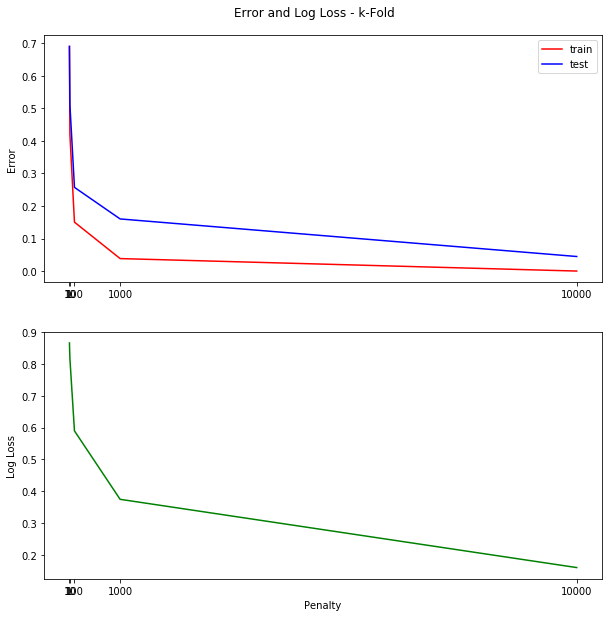

In [173]:
# results array format: [[train], [test], [log loss]]
results = [[],[],[]]

# input penalty iterations
hyperparams = [1, 10, 100, 1000, 10000]

# select validation type
val_type = "k-Fold"
# val_type = "loo"

for penalty in hyperparams:
    # calculate train error, test error and log loss for specific param
    if (val_type == "k-Fold"):
        train_res, test_res, log_loss_val = kFoldValidation(penalty, 10)
    else:
        train_res, test_res, log_loss_val = looValidation(penalty)
    
    # save error and log loss for each penalty for graph
    results[0].append(1-train_res)
    results[1].append(1-test_res)
    results[2].append(log_loss_val)

    print ("-----C={}-----".format(penalty))
    print ("-----Train-----")
    print ("Accuracy: {}".format(train_res))
    print ("-----Test-----")
    print ("Accuracy: {}".format(test_res))
    print ("Log Loss: {}\n".format(log_loss_val))
    
# create graph for penalty iterations
f, axarr = plt.subplots(2, sharex=False)
f.suptitle('Error and Log Loss - {}'.format(val_type), y = 0.92)
f.set_size_inches(10, 10)

# subplot 1: error plot
axarr[0].set_ylabel('Error')
axarr[0].plot(hyperparams, results[0], color='r', label='train')
axarr[0].plot(hyperparams, results[1], color='b', label='test')
axarr[0].set_xticks(hyperparams)
axarr[0].legend()

# subplot 2: log loss plot
axarr[1].set_ylabel('Log Loss')
axarr[1].plot(hyperparams, results[2], color='g', label='log loss')
axarr[1].set_xticks(hyperparams)
axarr[1].set_xlabel('Penalty')
plt.show()